# Creating a Recommender System based on Item based Collaborative Filtering

<b>Import Libraries<b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<b>Load Movie Title Dataset<b>

In [2]:
movie_id_titles = pd.read_csv('Movie_Id_Titles')

In [3]:
movie_id_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [4]:
movie_id_titles.tail()

item_id                                      title
1677     1678                          Mat' i syn (1997)
1678     1679                           B. Monkey (1998)
1679     1680                       Sliding Doors (1998)
1680     1681                        You So Crazy (1994)
1681     1682  Scream of Stone (Schrei aus Stein) (1991)

<b>Load Movie Rating Dataset<b>

In [5]:
movie_ratings = pd.read_csv('u.data', sep = '\t', names = ['user_id','item_id','rating','timestamp'] )

In [6]:
movie_ratings.head()

user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742

In [7]:
movie_ratings.tail()

user_id  item_id  rating  timestamp
99998       880      476       3  880175444
99999       716      204       5  879795543
100000      276     1090       1  874795795
100001       13      225       2  882399156
100002       12      203       3  879959583

<b>Since timestamp field does not yield anything fruitful, we will drop it<b>

In [8]:
movie_ratings.drop('timestamp', axis=1, inplace=True)
# pass 'timestamp' as ['timestamp'] if there are multiple columns to be dropped & separate by comma

<b>View Dataset Information<b>

In [9]:
movie_ratings.head()

user_id  item_id  rating
0        0       50       5
1        0      172       5
2        0      133       1
3      196      242       3
4      186      302       3

In [11]:
movie_id_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
item_id    1682 non-null int64
title      1682 non-null object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [12]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
user_id    100003 non-null int64
item_id    100003 non-null int64
rating     100003 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


In [15]:
movie_id_titles.describe().transpose()

count   mean         std  min     25%    50%      75%     max
item_id  1682.0  841.5  485.695893  1.0  421.25  841.5  1261.75  1682.0

In [17]:
movie_ratings.describe().transpose()

count        mean         std  min    25%    50%    75%     max
user_id  100003.0  462.470876  266.622454  0.0  254.0  447.0  682.0   943.0
item_id  100003.0  425.520914  330.797791  1.0  175.0  322.0  631.0  1682.0
rating   100003.0    3.529864    1.125704  1.0    3.0    4.0    4.0     5.0

<b>Merge the 2 dataframes<b>

In [18]:
movie_ratings = pd.merge(movie_ratings, movie_id_titles, on='item_id')

In [20]:
movie_ratings.head()

user_id  item_id  rating             title
0        0       50       5  Star Wars (1977)
1      290       50       5  Star Wars (1977)
2       79       50       4  Star Wars (1977)
3        2       50       5  Star Wars (1977)
4        8       50       5  Star Wars (1977)

In [21]:
movie_ratings.tail()

user_id  item_id  rating  \
99998       840     1674       4   
99999       655     1640       3   
100000      655     1637       3   
100001      655     1630       3   
100002      655     1641       3   

                                                    title  
99998                                   Mamma Roma (1962)  
99999                              Eighth Day, The (1996)  
100000                                  Girls Town (1996)  
100001  Silence of the Palace, The (Saimt el Qusur) (1...  
100002                                    Dadetown (1995)

In [22]:
movie_ratings.shape

(100003, 4)

<b>Visualize Dataset for better exposure:<b>

In [24]:
pd.set_option('display.max_columns', None)

<b>Group data of individual movies:<b>

In [25]:
movie_ratings.groupby('title').describe()

user_id                                 \
                                        count        mean         std    min   
title                                                                          
'Til There Was You (1997)                 9.0  383.777778  204.272354  152.0   
1-900 (1994)                              5.0  477.000000  244.344020  181.0   
101 Dalmatians (1996)                   109.0  450.330275  295.142779    1.0   
12 Angry Men (1957)                     125.0  453.552000  255.588677    1.0   
187 (1997)                               41.0  517.097561  241.098300    3.0   
...                                       ...         ...         ...    ...   
Young Guns II (1990)                     44.0  504.068182  254.101371   87.0   
Young Poisoner's Handbook, The (1995)    41.0  452.487805  286.352241    7.0   
Zeus and Roxanne (1997)                   6.0  532.833333  343.690219   82.0   
unknown                                   9.0  311.888889  264.160200    1.0   
Á köldum klaka (Cold Fever) (1994)        1.0  655.000000         NaN  655.0   

                                                                  item_id  \
                                         25%    50%    75%    max   count   
title                                                                       
'Til There Was You (1997)              223.0  342.0  530.0  782.0     9.0   
1-900 (1994)                           385.0  405.0  581.0  833.0     5.0   
101 Dalmatians (1996)                  183.0  435.0  699.0  938.0   109.0   
12 Angry Men (1957)                    268.0  429.0  661.0  932.0   125.0   
187 (1997)                             416.0  532.0  698.0  894.0    41.0   
...                                      ...    ...    ...    ...     ...   
Young Guns II (1990)                   301.0  459.0  732.5  943.0    44.0   
Young Poisoner's Handbook, The (1995)  246.0  473.0  634.0  936.0    41.0   
Zeus and Roxanne (1997)                251.5  627.5  796.5  881.0     6.0   
unknown                                130.0  297.0  422.0  833.0     9.0   
Á köldum klaka (Cold Fever) (1994)     655.0  655.0  655.0  655.0     1.0   

                                                                            \
                                         mean  std     min     25%     50%   
title                                                                        
'Til There Was You (1997)              1300.0  0.0  1300.0  1300.0  1300.0   
1-900 (1994)                           1353.0  0.0  1353.0  1353.0  1353.0   
101 Dalmatians (1996)                   225.0  0.0   225.0   225.0   225.0   
12 Angry Men (1957)                     178.0  0.0   178.0   178.0   178.0   
187 (1997)                              330.0  0.0   330.0   330.0   330.0   
...                                       ...  ...     ...     ...     ...   
Young Guns II (1990)                   1188.0  0.0  1188.0  1188.0  1188.0   
Young Poisoner's Handbook, The (1995)   547.0  0.0   547.0   547.0   547.0   
Zeus and Roxanne (1997)                1164.0  0.0  1164.0  1164.0  1164.0   
unknown                                 267.0  0.0   267.0   267.0   267.0   
Á köldum klaka (Cold Fever) (1994)     1633.0  NaN  1633.0  1633.0  1633.0   

                                                      rating            \
                                          75%     max  count      mean   
title                                                                    
'Til There Was You (1997)              1300.0  1300.0    9.0  2.333333   
1-900 (1994)                           1353.0  1353.0    5.0  2.600000   
101 Dalmatians (1996)                   225.0   225.0  109.0  2.908257   
12 Angry Men (1957)                     178.0   178.0  125.0  4.344000   
187 (1997)                              330.0   330.0   41.0  3.024390   
...                                       ...     ...    ...       ...   
Young Guns II (1990)                   1188.0  1188.0   44.0  2.772727   
Young

<b>Group data only with the rating column<b>

In [26]:
movie_ratings.groupby('title')['rating'].describe()

count      mean       std  min   25%  \
title                                                                         
'Til There Was You (1997)                9.0  2.333333  1.000000  1.0  2.00   
1-900 (1994)                             5.0  2.600000  1.516575  1.0  1.00   
101 Dalmatians (1996)                  109.0  2.908257  1.076184  1.0  2.00   
12 Angry Men (1957)                    125.0  4.344000  0.719588  2.0  4.00   
187 (1997)                              41.0  3.024390  1.172344  1.0  2.00   
...                                      ...       ...       ...  ...   ...   
Young Guns II (1990)                    44.0  2.772727  1.008421  1.0  2.00   
Young Poisoner's Handbook, The (1995)   41.0  3.341463  1.237129  1.0  3.00   
Zeus and Roxanne (1997)                  6.0  2.166667  0.983192  1.0  1.25   
unknown                                  9.0  3.444444  1.130388  1.0  3.00   
Á köldum klaka (Cold Fever) (1994)       1.0  3.000000       NaN  3.0  3.00   

                                       50%  75%  max  
title                                                 
'Til There Was You (1997)              2.0  3.0  4.0  
1-900 (1994)                           3.0  4.0  4.0  
101 Dalmatians (1996)                  3.0  4.0  5.0  
12 Angry Men (1957)                    4.0  5.0  5.0  
187 (1997)                             3.0  4.0  5.0  
...                                    ...  ...  ...  
Young Guns II (1990)                   3.0  3.0  5.0  
Young Poisoner's Handbook, The (1995)  4.0  4.0  5.0  
Zeus and Roxanne (1997)                2.5  3.0  3.0  
unknown                                4.0  4.0  5.0  
Á köldum klaka (Cold Fever) (1994)     3.0  3.0  3.0  

[1664 rows x 8 columns]

<b>Create dataframe containing mean of movie ratings<b>

In [27]:
mean_ratings_df = movie_ratings.groupby('title')['rating'].describe()['mean']

In [29]:
mean_ratings_df

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

<b>Create dataframe containing count of movie ratings<b>

In [31]:
count_ratings_df = movie_ratings.groupby('title')['rating'].describe()['count']

In [32]:
count_ratings_df

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [33]:
ratings_mean_count_df = pd.concat([count_ratings_df, mean_ratings_df], axis=1)

In [34]:
ratings_mean_count_df

count      mean
title                                                 
'Til There Was You (1997)                9.0  2.333333
1-900 (1994)                             5.0  2.600000
101 Dalmatians (1996)                  109.0  2.908257
12 Angry Men (1957)                    125.0  4.344000
187 (1997)                              41.0  3.024390
...                                      ...       ...
Young Guns II (1990)                    44.0  2.772727
Young Poisoner's Handbook, The (1995)   41.0  3.341463
Zeus and Roxanne (1997)                  6.0  2.166667
unknown                                  9.0  3.444444
Á köldum klaka (Cold Fever) (1994)       1.0  3.000000

[1664 rows x 2 columns]

In [35]:
ratings_mean_count_df.reset_index()

title  count      mean
0                 'Til There Was You (1997)    9.0  2.333333
1                              1-900 (1994)    5.0  2.600000
2                     101 Dalmatians (1996)  109.0  2.908257
3                       12 Angry Men (1957)  125.0  4.344000
4                                187 (1997)   41.0  3.024390
...                                     ...    ...       ...
1659                   Young Guns II (1990)   44.0  2.772727
1660  Young Poisoner's Handbook, The (1995)   41.0  3.341463
1661                Zeus and Roxanne (1997)    6.0  2.166667
1662                                unknown    9.0  3.444444
1663     Á köldum klaka (Cold Fever) (1994)    1.0  3.000000

[1664 rows x 3 columns]

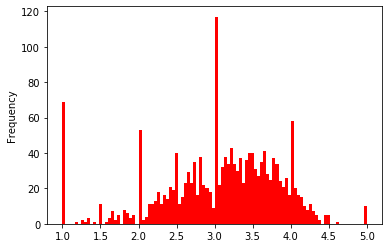

In [36]:
ratings_mean_count_df['mean'].plot(bins=100, kind = 'hist', color = 'r')

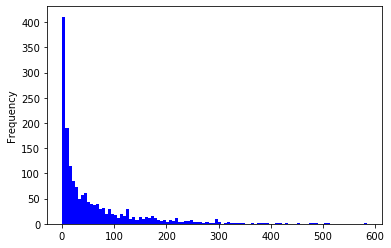

In [37]:
ratings_mean_count_df['count'].plot(bins = 100, kind = 'hist', color = 'b')

In [38]:
ratings_mean_count_df[ratings_mean_count_df['mean']==5]

count  mean
title                                                         
Aiqing wansui (1994)                                 1.0   5.0
Entertaining Angels: The Dorothy Day Story (1996)    1.0   5.0
Great Day in Harlem, A (1994)                        1.0   5.0
Marlene Dietrich: Shadow and Light (1996)            1.0   5.0
Prefontaine (1997)                                   3.0   5.0
Saint of Fort Washington, The (1993)                 2.0   5.0
Santa with Muscles (1996)                            2.0   5.0
Someone Else's America (1995)                        1.0   5.0
Star Kid (1997)                                      3.0   5.0
They Made Me a Criminal (1939)                       1.0   5.0

In [41]:
ratings_mean_count_df.sort_values('count', ascending=False).head(20)

count      mean
title                                            
Star Wars (1977)                  584.0  4.359589
Contact (1997)                    509.0  3.803536
Fargo (1996)                      508.0  4.155512
Return of the Jedi (1983)         507.0  4.007890
Liar Liar (1997)                  485.0  3.156701
English Patient, The (1996)       481.0  3.656965
Scream (1996)                     478.0  3.441423
Toy Story (1995)                  452.0  3.878319
Air Force One (1997)              431.0  3.631090
Independence Day (ID4) (1996)     429.0  3.438228
Raiders of the Lost Ark (1981)    420.0  4.252381
Godfather, The (1972)             413.0  4.283293
Pulp Fiction (1994)               394.0  4.060914
Twelve Monkeys (1995)             392.0  3.798469
Silence of the Lambs, The (1991)  390.0  4.289744
Jerry Maguire (1996)              384.0  3.710938
Chasing Amy (1997)                379.0  3.839050
Rock, The (1996)                  378.0  3.693122
Empire Strikes Back, The (1980)   368.0  4.206522
Star Trek: First Contact (1996)   365.0  3.660274

In [42]:
ratings_mean_count_df.sort_values('count').head(20)

count  mean
title                                                   
Á köldum klaka (Cold Fever) (1994)             1.0   3.0
Mille bolle blu (1993)                         1.0   1.0
Mat' i syn (1997)                              1.0   1.0
Marlene Dietrich: Shadow and Light (1996)      1.0   5.0
Man from Down Under, The (1943)                1.0   1.0
Mamma Roma (1962)                              1.0   4.0
Mad Dog Time (1996)                            1.0   3.0
Big Bang Theory, The (1994)                    1.0   4.0
MURDER and murder (1996)                       1.0   2.0
Coldblooded (1995)                             1.0   2.0
Low Life, The (1994)                           1.0   1.0
Love Is All There Is (1996)                    1.0   3.0
Lotto Land (1995)                              1.0   1.0
Bird of Prey (1996)                            1.0   1.0
Liebelei (1933)                                1.0   1.0
Leopard Son, The (1996)                        1.0   1.0
Lashou shentan (1992)                          1.0   1.0
Land and Freedom (Tierra y libertad) (1995)    1.0   3.0
Lady of Burlesque (1943)                       1.0   4.0
Big One, The (1997)                            1.0   3.0

<b>Perform Item based collaborative filtering for a single movie<b>

In [47]:
user_movie_matrix = movie_ratings.pivot_table(index='user_id', columns='title', values='rating')

In [48]:
user_movie_matrix

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
...                            ...           ...                    ...   
939                            NaN           NaN                    NaN   
940                            NaN           NaN                    NaN   
941                            NaN           NaN                    NaN   
942                            NaN           NaN                    NaN   
943                            NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
...                      ...         ...                          ...   
939                      NaN         NaN                          NaN   
940                      NaN         NaN                          NaN   
941                      NaN         NaN                          NaN   
942                      NaN         NaN                          NaN   
943                      NaN         NaN                          2.0   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
...                                      ...                           ...   
939                                      NaN                           NaN   
940                                      NaN                           NaN   
941                                      NaN                           NaN   
942                                      NaN                           3.0   
943                                      NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   
...                                              ...                   ...   
939                                              NaN                   NaN   
940                                              NaN                   NaN   
941                                              NaN                   NaN   
942                                              NaN                   3.0   
943                                              NaN                   NaN   

title    8 1/2 (1963)  8 Heads in a Duffel B

In [50]:
titanic = user_movie_matrix['Titanic (1997)']
titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

<b>Create a correlation of a single movie with the entire movie matrix<b>

In [52]:
titanic_correlations = pd.DataFrame(user_movie_matrix.corrwith(titanic), columns = ['Correlations'])

e:\users\user.desktop-3hhgvth\anaconda3\envs\mytfenv\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
e:\users\user.desktop-3hhgvth\anaconda3\envs\mytfenv\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [56]:
titanic_correlations.sort_values('Correlations', ascending=False)

Correlations
title                                                 
Nadja (1994)                                       1.0
Pest, The (1997)                                   1.0
Savage Nights (Nuits fauves, Les) (1992)           1.0
For Ever Mozart (1996)                             1.0
Jerky Boys, The (1994)                             1.0
...                                                ...
Yankee Zulu (1994)                                 NaN
You So Crazy (1994)                                NaN
Zeus and Roxanne (1997)                            NaN
unknown                                            NaN
Á köldum klaka (Cold Fever) (1994)                 NaN

[1664 rows x 1 columns]

In [57]:
titanic_correlations = titanic_correlations.join(ratings_mean_count_df['count'])

In [58]:
titanic_correlations

Correlations  count
title                                                     
'Til There Was You (1997)                 -0.062017    9.0
1-900 (1994)                                    NaN    5.0
101 Dalmatians (1996)                      0.120113  109.0
12 Angry Men (1957)                        0.077700  125.0
187 (1997)                                 0.315654   41.0
...                                             ...    ...
Young Guns II (1990)                       0.317274   44.0
Young Poisoner's Handbook, The (1995)      0.356783   41.0
Zeus and Roxanne (1997)                         NaN    6.0
unknown                                         NaN    9.0
Á köldum klaka (Cold Fever) (1994)              NaN    1.0

[1664 rows x 2 columns]

In [59]:
titanic_correlations.isnull().sum()

Correlations    308
count             0
dtype: int64

In [60]:
titanic_correlations.dropna(inplace=True)
titanic_correlations.isnull().sum()

Correlations    0
count           0
dtype: int64

In [61]:
titanic_correlations

Correlations  count
title                                                     
'Til There Was You (1997)                 -0.062017    9.0
101 Dalmatians (1996)                      0.120113  109.0
12 Angry Men (1957)                        0.077700  125.0
187 (1997)                                 0.315654   41.0
2 Days in the Valley (1996)                0.017295   93.0
...                                             ...    ...
Year of the Horse (1997)                   1.000000    7.0
Young Frankenstein (1974)                  0.107666  200.0
Young Guns (1988)                          0.199931  101.0
Young Guns II (1990)                       0.317274   44.0
Young Poisoner's Handbook, The (1995)      0.356783   41.0

[1356 rows x 2 columns]

In [62]:
titanic_correlations.sort_values('Correlations', ascending=False)

Correlations  count
title                                                        
Nadja (1994)                                       1.0    8.0
Pest, The (1997)                                   1.0    8.0
Savage Nights (Nuits fauves, Les) (1992)           1.0    3.0
For Ever Mozart (1996)                             1.0    3.0
Jerky Boys, The (1994)                             1.0    3.0
...                                                ...    ...
Pather Panchali (1955)                            -1.0    8.0
Angel Baby (1995)                                 -1.0    4.0
Blood Beach (1981)                                -1.0    6.0
Two Bits (1995)                                   -1.0    5.0
Faces (1968)                                      -1.0    4.0

[1356 rows x 2 columns]

<b>Find Movies highly co-related with Titanic & with count above 80<b>

In [63]:
titanic_correlations[titanic_correlations['count']>80].sort_values('Correlations', ascending=False)

Correlations  count
title                                                         
Titanic (1997)                                 1.000000  350.0
River Wild, The (1994)                         0.497600  146.0
Abyss, The (1989)                              0.472103  151.0
Bram Stoker's Dracula (1992)                   0.443560  120.0
True Lies (1994)                               0.435104  208.0
...                                                 ...    ...
Brazil (1985)                                 -0.243532  208.0
Richard III (1995)                            -0.275451   89.0
Cold Comfort Farm (1995)                      -0.307150  125.0
Unbearable Lightness of Being, The (1988)     -0.314476   92.0
James and the Giant Peach (1996)              -0.370248  126.0

[416 rows x 2 columns]

<b>Find correlations with high count for Star Wars<b>

In [65]:
starwars = user_movie_matrix['Star Wars (1977)']
starwars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [66]:
starwars_correlation = pd.DataFrame(user_movie_matrix.corrwith(starwars), columns = ['Correlations'])
starwars_correlation

e:\users\user.desktop-3hhgvth\anaconda3\envs\mytfenv\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
e:\users\user.desktop-3hhgvth\anaconda3\envs\mytfenv\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Correlations
title                                              
'Til There Was You (1997)                  0.872872
1-900 (1994)                              -0.645497
101 Dalmatians (1996)                      0.211132
12 Angry Men (1957)                        0.184289
187 (1997)                                 0.027398
...                                             ...
Young Guns II (1990)                       0.228615
Young Poisoner's Handbook, The (1995)     -0.007374
Zeus and Roxanne (1997)                    0.818182
unknown                                    0.723123
Á köldum klaka (Cold Fever) (1994)              NaN

[1664 rows x 1 columns]

In [67]:
starwars_correlation = starwars_correlation.join(ratings_mean_count_df['count'])
starwars_correlation

Correlations  count
title                                                     
'Til There Was You (1997)                  0.872872    9.0
1-900 (1994)                              -0.645497    5.0
101 Dalmatians (1996)                      0.211132  109.0
12 Angry Men (1957)                        0.184289  125.0
187 (1997)                                 0.027398   41.0
...                                             ...    ...
Young Guns II (1990)                       0.228615   44.0
Young Poisoner's Handbook, The (1995)     -0.007374   41.0
Zeus and Roxanne (1997)                    0.818182    6.0
unknown                                    0.723123    9.0
Á köldum klaka (Cold Fever) (1994)              NaN    1.0

[1664 rows x 2 columns]

In [68]:
starwars_correlation[starwars_correlation['count']>80].sort_values('Correlations', ascending=False)

Correlations  count
title                                                                  
Star Wars (1977)                                        1.000000  584.0
Empire Strikes Back, The (1980)                         0.748353  368.0
Return of the Jedi (1983)                               0.672556  507.0
Raiders of the Lost Ark (1981)                          0.536117  420.0
Austin Powers: International Man of Mystery (1997)      0.377433  130.0
...                                                          ...    ...
Dirty Dancing (1987)                                   -0.156920   98.0
G.I. Jane (1997)                                       -0.176734  175.0
Evil Dead II (1987)                                    -0.190719   89.0
First Wives Club, The (1996)                           -0.194496  160.0
Rosencrantz and Guildenstern Are Dead (1990)           -0.197935   90.0

[416 rows x 2 columns]

In [69]:
starwars_correlation.isnull().sum()

Correlations    254
count             0
dtype: int64

In [70]:
starwars_correlation.dropna(inplace=True)

In [71]:
starwars_correlation.isnull().sum()

Correlations    0
count           0
dtype: int64

<b>Create Item based collaborative filter on entire dataset<b>

In [73]:
user_movie_matrix.head(10)

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   
6                              NaN           NaN                    NaN   
7                              NaN           NaN                    NaN   
8                              NaN           NaN                    NaN   
9                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
5                        NaN         NaN                          NaN   
6                        4.0         NaN                          NaN   
7                        4.0         NaN                          NaN   
8                        NaN         NaN                          NaN   
9                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
5                                        NaN                           4.0   
6                                        NaN                           5.0   
7                                        5.0                           5.0   
8                                        NaN                           NaN   
9                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   
5                                                NaN                   NaN   
6                                                NaN                   NaN   
7                                                NaN                   4.0   
8                                                NaN                   NaN   
9                                                NaN                   4.0   

title    8 1/2 (1963)  8 Heads in a Duffel Bag (1997)  8 Seconds (1994)  \
user_id                                                                   
0                 NaN                             NaN               NaN   
1                 NaN                             NaN               NaN   
2                 NaN                           

In [74]:
movie_correlations = user_movie_matrix.corr(method='pearson',min_periods=80)
movie_correlations

title                                  'Til There Was You (1997)  \
title                                                              
'Til There Was You (1997)                                    NaN   
1-900 (1994)                                                 NaN   
101 Dalmatians (1996)                                        NaN   
12 Angry Men (1957)                                          NaN   
187 (1997)                                                   NaN   
...                                                          ...   
Young Guns II (1990)                                         NaN   
Young Poisoner's Handbook, The (1995)                        NaN   
Zeus and Roxanne (1997)                                      NaN   
unknown                                                      NaN   
Á köldum klaka (Cold Fever) (1994)                           NaN   

title                                  1-900 (1994)  101 Dalmatians (1996)  \
title                                                                        
'Til There Was You (1997)                       NaN                    NaN   
1-900 (1994)                                    NaN                    NaN   
101 Dalmatians (1996)                           NaN                    1.0   
12 Angry Men (1957)                             NaN                    NaN   
187 (1997)                                      NaN                    NaN   
...                                             ...                    ...   
Young Guns II (1990)                            NaN                    NaN   
Young Poisoner's Handbook, The (1995)           NaN                    NaN   
Zeus and Roxanne (1997)                         NaN                    NaN   
unknown                                         NaN                    NaN   
Á köldum klaka (Cold Fever) (1994)              NaN                    NaN   

title                                  12 Angry Men (1957)  187 (1997)  \
title                                                                    
'Til There Was You (1997)                              NaN         NaN   
1-900 (1994)                                           NaN         NaN   
101 Dalmatians (1996)                                  NaN         NaN   
12 Angry Men (1957)                                    1.0         NaN   
187 (1997)                                             NaN         NaN   
...                                                    ...         ...   
Young Guns II (1990)                                   NaN         NaN   
Young Poisoner's Handbook, The (1995)                  NaN         NaN   
Zeus and Roxanne (1997)                                NaN         NaN   
unknown                                                NaN         NaN   
Á köldum klaka (Cold Fever) (1994)                     NaN         NaN   

title                                  2 Days in the Valley (1996)  \
title                                                                
'Til There Was You (1997)                                      NaN   
1-900 (1994)                                                   NaN   
101 Dalmatians (1996)                                          NaN   
12 Angry Men (1957)                                            NaN   
187 (1997)                                                     NaN   
...                                                            ...   
Young Guns II (1990)                                           NaN   
Young Poisoner's Handbook, The (1995)                          NaN   
Zeus and Roxanne (1997)                                        NaN   
unknown                                                        NaN   
Á köldum klaka (Cold Fever) (1994)                             NaN   

title                                  20,000 Leagues Under the Sea (1954)  \
title                                                                        
'Til There Was You (1997)                                             

In [75]:
my_movie_ratings = pd.read_csv('My_Ratings.csv')
my_movie_ratings

Movie Name  Ratings
0  Liar Liar (1997)        5
1  Star Wars (1977)        1

In [76]:
my_movie_ratings['Movie Name'][0]

'Liar Liar (1997)'

<b>Create an accumulator<b>

In [79]:
similar_movie_list = pd.Series()

In [80]:
for i in range(0,2):
    similar_movie = movie_correlations[my_movie_ratings['Movie Name'][i]].dropna()
    similar_movie = similar_movie.map(lambda x: x*my_movie_ratings['Ratings'][i])
    similar_movie_list = similar_movie_list.append(similar_movie)

In [82]:
similar_movie_list.sort_values(inplace=True, ascending=False)
similar_movie_list.head(10)

Liar Liar (1997)                             5.000000
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
Top Gun (1986)                               2.028602
G.I. Jane (1997)                             1.989656
Multiplicity (1996)                          1.984302
Grumpier Old Men (1995)                      1.953494
Ghost and the Darkness, The (1996)           1.895376
dtype: float64